In [ ]:
%matplotlib inline
import networkx as nx

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Hubs

Contents:

1. [Finding hubs](#Finding-hubs)
2. [Centrality distributions](#Centrality-distributions)
3. [Testing robustness](#Testing-robustness)


## 1. Finding hubs

Often when looking at a network, we want to find the most "important" nodes, for some definition of important. The most basic measure of centrality is the *degree*, or number of links attached to a node.

Let's look at the Enron executive email graph:

Graph with 143 nodes and 623 edges


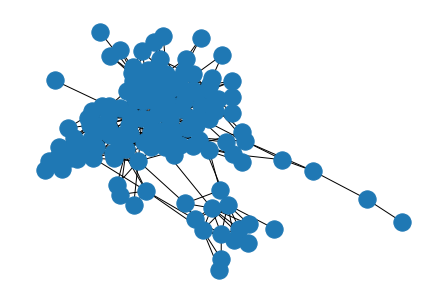

In [ ]:
# You may need to replace the path if your setup is different.
G = nx.read_edgelist('/content/drive/MyDrive/2022 FALL COURSES/INFO-I368/HW9/ia-enron-only.edges')
print(nx.info(G))
nx.draw(G)

We're going to make use of Python's built-in `max` function in order to find the node with the highest degree. 

### Aside: the `max` function

First, let us recall what the `max` function does. At its most basic, the `max` function returns the "greatest" item in a sequence:

In [ ]:
max([1,2,3,4,5])

5

But the "greatest" item is not always obvious:

In [ ]:
max(['apple', 'grape', 'carrot'])

'grape'

Why is `grape` greater than the other options? Because the default sort for strings is lexicographical (basically alphabetical) order. If we don't want this default ordering, we can specify a *key* function, which tells Python how to compare the items:

In [ ]:
max(['apple', 'grape', 'carrot'], key=len)

'carrot'

Now `carrot` is the greatest element, because we're comparing the items by their length. Note that we can specify `len` as the key without defining it because it is a built in key type. 

But we can specify other keys as well. For example, let's say we have a dictionary where the keys are element symbols, and the keys are the names of those elements - we want to know which of the elements in our dictionary has the longest name. 

In [ ]:
elements = {'Al' : 'Aluminum', 'Ar': 'Argon', 'Be' : 'Beryllium', 'B': 'Boron', 'C' : 'Calcium', 'Ca' : 'Carbon',
            'Cl' : 'Chlorine',	'F': 'Fluorine', 'He': 'Helium', 'H': 'Hydrogen', 'Li': 'Lithium', 'Mg': 'Magnesium',
            'N' : 'Nitrogen', 'Ne' : 'Neon', 'O' : 'Oxygen', 'P' : 'Phosphorus' , 'K' : 'Potassium', 'Si' : 'Silicon', 
            'Na' : 'Sodium', 'S' : 'Sulfer'}

symbol_of_longest_named_element = max(elements, key = lambda x: len(elements[x]))

print(symbol_of_longest_named_element)
print(elements[symbol_of_longest_named_element])
print(len(elements[symbol_of_longest_named_element]))

P
Phosphorus
10


# <font color='blue'>Concept Check 1</font>

*Concept checks are ungraded opportunities to try out the concepts we're learning. If these come up in class, feel free to work together or consult with your classmates.*

We have a list of game scores, and we want to see which one of them has the highest digit in the 1's position. 

Given what we know about the modulo `%` operator, replace the comment with a `lambda` expression that produces the correct result (18) 

In [ ]:
game_scores = [18, 52, 23, 41, 32, 504, 4]
largest_in_ones_pos = max(game_scores, key= lambda x: x%10)
print(largest_in_ones_pos)

18


### Finding the node with max degree

We can apply the `max` function to get the maximum node according to some criterion. In our case, we want to compare the nodes by their degree:

In [ ]:
highest_degree_node = max(G.nodes, key=G.degree)
highest_degree_node

'105'

Note that this is telling us the id of the node with the highest degree, it is *not* telling us the number of edges attached. 

But now that we know the id, we can easily get that information: 

In [ ]:
G.degree(highest_degree_node)

42

So we know that node `'105'` has 42 edges connected to it. Let's look at that calculation a little closer:

```python
max(G.nodes, key=G.degree)
```

We're telling the `max` function that we want the item from `G.nodes` that gives us the highest value when passed to the *key* function `G.degree`.

This construction works because `G.degree` is a function. Some other measures of centrality such as betweenness generate all of the nodes' centrality values at once and return a `dict`. In this case, we need an extra step:

In [ ]:
betweenness = nx.centrality.betweenness_centrality(G)
highest_betweenness_node = max(G.nodes, key=betweenness.get)
highest_betweenness_node

'105'

In [ ]:
betweenness[highest_betweenness_node]

0.19400604344556296

Note that the following will throw an error:

In [ ]:
max(G.nodes, key=betweenness)

TypeError: ignored

This is because we need to provide a function to the `key` argument, but `betweenness` is a dict. To get around this, we use the dict's `get` method.
(If you are not familiar with this method, look it up! It can be incredibly useful) 

## 2. Centrality distributions

We've found the most central node in the network, but often we want to summarize information about the centrality of all nodes. For example, in addition to the maxmimum degree, we often want the mean and median degree in a network.

The first step in summarizing this information is to get a sequence of all of the centrality values in the graph. We don't care about the node names anymore, we just want a sequence of numbers. We can start with the example of degree:

In [ ]:
degree_sequence = [G.degree(n) for n in G.nodes]
# or 
# degree_sequence = dict(G.degree()).values()

To get the mean and median of this sequence, we can use Python's built-in `statistics` module:

In [ ]:
import statistics

print('Mean degree:', statistics.mean(degree_sequence))
print('Median degree:', statistics.median(degree_sequence))

Mean degree: 8.713286713286713
Median degree: 8


For other measures of centrality, which are calculated for the whole network at once and return a dict, we can use the dict's `.values()`.

In [ ]:
betweenness = nx.centrality.betweenness_centrality(G)
betweenness_sequence = betweenness.values()

print('Mean betweenness:', statistics.mean(betweenness_sequence))
print('Median betweenness:', statistics.median(betweenness_sequence))

Mean betweenness: 0.013950388838012454
Median betweenness: 0.0037492834763570323


### Plotting the distribution

We can graphically represent the sequence of centrality values by using a *histogram*. In its basic form, a histogram plots the degree values on the x-axis, and the number of nodes having that degree on the y-axis. To do this counting, we can make use of Python's `collections.Counter`.

In [ ]:
from collections import Counter

degree_counts = Counter(degree_sequence)
degree_counts

Counter({30: 1,
         2: 16,
         17: 5,
         12: 5,
         13: 3,
         16: 5,
         10: 9,
         11: 10,
         18: 3,
         20: 1,
         15: 3,
         19: 2,
         7: 9,
         14: 6,
         9: 16,
         42: 1,
         8: 6,
         5: 8,
         6: 7,
         1: 6,
         4: 11,
         23: 1,
         3: 9})

The `Counter` object returned is like a dict, pairing the item counted with the number of times it showed up in the sequence.

On this basic histogram plot, we want an x-value for every integer between the minimum and maximum degree in the sequence, inclusive. Note that `degree_counts.keys()` gives us every distinct value seen in the degree sequence. Also note that we need the +1 in the `range` below because we want to include the right endpoint.

In [ ]:
min_degree, max_degree = min(degree_counts.keys()), max(degree_counts.keys())

plot_x = list(range(min_degree, max_degree + 1))

Our y-values are then the number of times we counted each x-value in the degree sequence. We can make use of the `.get` method with a default value in order to count 0 for degree values that don't show up in the sequence. For example, notice that 32 does not show up in `degree_counts` above, so `degree_counts.get(32, 0)` will give us 0.

In [ ]:
plot_y = [degree_counts.get(x, 0) for x in plot_x]

To do the plotting, we use Matplotlib's `pyplot` module.

<BarContainer object of 42 artists>

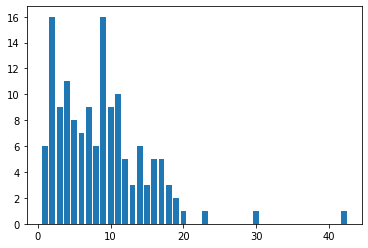

In [ ]:
import matplotlib.pyplot as plt

plt.bar(plot_x, plot_y)

Note that `pyplot` would also have worked without bothering with the zeros:

`plt.bar(degree_counts.keys(), degree_counts.values())`

But it's always good to think carefully about missing values!

### Histogram binning

When there are more x-values than you can comfortably display, or when your centrality measure is not discrete, as in the case of betweenness centrality, we can make use of histogram "binning." This just defines a sequence of disjoint intervals called *bins*, and counts the number of values that fall into each such bin. In the simplest of cases, we can just tell Pyplot's `hist` function how many bins we want and it will do the binning for us.

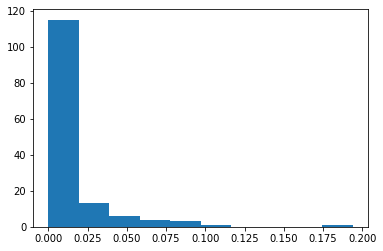

In [ ]:
counts, bins, patches = plt.hist(betweenness_sequence, bins=10)

We can investigate the returned `bins` and `counts` if we want:

In [ ]:
bins

array([0.        , 0.0194006 , 0.03880121, 0.05820181, 0.07760242,
       0.09700302, 0.11640363, 0.13580423, 0.15520483, 0.17460544,
       0.19400604])

In [ ]:
counts

array([115.,  13.,   6.,   4.,   3.,   1.,   0.,   0.,   0.,   1.])

From these, we can see that there are 115 values between 0 and 0.0194006, 13 values between 0.194006 and 0.3880121, etc.

# <font color='blue'>Concept Check 2</font>

*Concept checks are ungraded opportunities to try out the concepts we're learning. If these come up in class, feel free to work together or consult with your classmates.*

Given that each value in `counts` represents the number of nodes with that degree, we should be able to see that the sum of `counts` is equal to the number of nodes in our graph. Write code to verify this claim. 

*Hint*: remember the `sum()` function. 

In [ ]:
#using sum()
print(sum(counts)==G.number_of_nodes());

True


#<font color='red'>EXERCISE 1</font>

As seen in the previous homework - the socfb-Northwestern25 network is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. 



In [ ]:
# You may need to replace the path if your setup is different.
northwestern_fb_file_path = '/content/drive/MyDrive/2022 FALL COURSES/INFO-I368/HW9/socfb-Northwestern25.edgelist'
J = nx.read_edgelist(northwestern_fb_file_path)

Which of the following shapes best describes the degree distribution in
this network?

**a.** *Uniform: node degrees are evenly distributed between the minimum and maximum.*

**b.** *Normal: most node degrees are near the mean, dropping rapidly in both directions.*

**c.** *Right-tailed: most node degrees are relatively small compared to
the range of degrees.* 

**d.** *Left-tailed: most node degrees are relatively large compared to the
range of degrees.*

**Put your answer as a comment in the next cell, and justify your answer by producing a histogram visualization**

In [ ]:
# Which of the above options describes the degree distribution in this network?
# Your answer here

#  The graph is Right-tailed: most node degrees are relatively small compared to the range of degrees.
# a lot of degrees are below the mean mostly low degree nodes 

Graph with 10567 nodes and 488337 edges
Mean degree: 92.42680041639065
num below:  6209  num above:  4358
min deg:  1  max deg:  2105


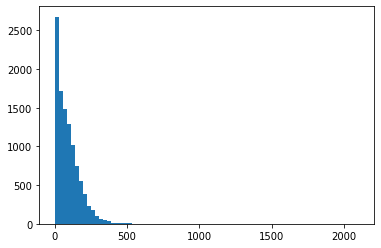

In [ ]:
# Write code to produce a histogram visualization. 
# Remember - it is possible to produce a plot that is not a proper histogram, it is your responsibilty to ensure the graph you produce is correct. 
print(nx.info(J))
deg_seq = [J.degree(n) for n in J.nodes]
deg_counts = Counter(deg_seq)

min_deg = min(deg_counts.keys())
max_deg = max(deg_counts.keys())
mean = statistics.mean(deg_seq)
print("Mean degree:", mean)
num_below_mean=0
num_above_mean=0
for deg in deg_seq:
  if deg <= mean:
    num_below_mean=num_below_mean+1
  else:
    num_above_mean=num_above_mean+1

print("num below: ", num_below_mean, " num above: ", num_above_mean)
print("min deg: ", min_deg, " max deg: ", max_deg)

plt_x = list(range(min_deg, max_deg))
plt_y = [deg_counts.get(x, 0) for x in plt_x]

deg_counts, bins, patches = plt.hist(deg_seq, bins=75)


### CCDF

As we discussed, for broad distributions it is often convenient to use the log-log scale and the complementary cumulative distribution function (CCDF) to avoid having to deal with logarithmic binning. Recall that the CCDF plots, for each value k, the cumulative probability of having nodes with values >= k. Here is one way to plot the CCDF in log-log scale:

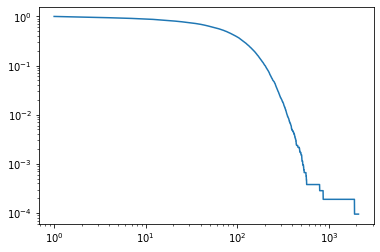

In [ ]:
cnt = Counter(dict(J.degree()).values()) # degree -> node_count
x = range(min(cnt.keys()), max(cnt.keys()) + 1) # all possible degree values
prob = 1.0 # prob of having degree >= 1
y = [prob]
for k in x:
  prob -= cnt.get(k,0) / J.number_of_nodes() # subtract prob of degree k
  y.append(prob)
y.pop() # drop the last value that would be zero, not plottable on log scale
plt.loglog(x,y) # line plot in log-log scale

## 3. Testing robustness

Another way to think about the relative "importance" of nodes in a network is to measure how much it would damage the network structure if particular nodes were to be removed. In real life, node removal might be a person moving away and out of a social network, someone changing jobs and being removed from an email network, internet routers being attacked/overloaded and going down, etc.

Broadly, we consider two types of network damage: random failure and targeted attack. In a random failure, nodes are chosen randomly for removal. In a targeted attack, we will remove nodes based on some criterion, for example, removing nodes in decreasing order of their degree centrality.

### Connected components

In order to measure "damage," we will measure the size of the network's largest connected component, sometimes called *core*. First we observe that `nx.connected_components` is a generator that provides the connected components one at a time. 

In [ ]:
nx.connected_components(G)

<generator object connected_components at 0x7fe4ad5d14d0>

Note that the components are returned unsorted. It is often the case that we want to look at the connected components in order of size, in which case we would need to sort them accordingly. 

In [ ]:
#How to sort connected components by size - in this case, the largest will be first
connected_comps = sorted(nx.connected_components(G), key=len, reverse=True)

Since we often only want the core, or largest connected component, we can simply access the first item in our `connected_comps` list

In [ ]:
core = connected_comps[0]
core

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',

But if we just want the largest component, we do not even need to sort:

In [ ]:
core = max(nx.connected_components(G), key=len) 
core

{'1',
 '10',
 '100',
 '101',
 '102',
 '103',
 '104',
 '105',
 '106',
 '107',
 '108',
 '109',
 '11',
 '110',
 '111',
 '112',
 '113',
 '114',
 '115',
 '116',
 '117',
 '118',
 '119',
 '12',
 '120',
 '121',
 '122',
 '123',
 '124',
 '125',
 '126',
 '127',
 '128',
 '129',
 '13',
 '130',
 '131',
 '132',
 '133',
 '134',
 '135',
 '136',
 '137',
 '138',
 '139',
 '14',
 '140',
 '141',
 '142',
 '143',
 '15',
 '16',
 '17',
 '18',
 '19',
 '2',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '3',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '4',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '5',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59',
 '6',
 '60',
 '61',
 '62',
 '63',
 '64',
 '65',
 '66',
 '67',
 '68',
 '69',
 '7',
 '70',
 '71',
 '72',
 '73',
 '74',
 '75',
 '76',
 '77',
 '78',
 '79',
 '8',
 '80',
 '81',
 '82',
 '83',
 '84',
 '85',
 '86',
 '87',
 '88',
 '89',
 '9',
 '90',
 '91',
 '92',
 '93',
 '94',

So the `len` of this set gives us the number of nodes in this component:

In [ ]:
len(core)

143

If we want all of the connected components, we can get a list of them:

In [ ]:
components = list(nx.connected_components(G))

the length of this list is the number of connected components:

In [ ]:
len(components)

1

# <font color='blue'>Concept Check 3</font>

*Concept checks are ungraded opportunities to try out the concepts we're learning. If these come up in class, feel free to work together or consult with your classmates.*

Given what we have learned about the definition of connectedness, what does the above tell us about the connectedness of our graph?

In [ ]:
# Replace this comment with your answer. 
# the graph is connected

### Random failure

Whenever we're going to engage in a distructive process, we want to make a copy of the network graph to attack so that we can easily get back to the original state:

In [ ]:
C = G.copy()

# <font color='blue'>Concept Check 4</font>

*Concept checks are ungraded opportunities to try out the concepts we're learning. If these come up in class, feel free to work together or consult with your classmates.*

To simulate random failure, we randomly choose some node names and remove them from the graph. 

The `random` library offers multiple methods for randomly selecting elements, but it is very important for us to understand the differences between them, in order to choose the correct one for each task. 

Take a few moments to read through:

www.geeksforgeeks.org/randomly-select-elements-from-list-without-repetition-in-python

Then replace the `#METHOD` comment with the correct function call. 

Replace the comment above the call with your justification for your choice.


In [ ]:
import random

# I WOULD CHOOSE THE SAMPLE METHOD BECAUSE IT WILL PICK FROM THE LIST OF NODES IN C AND REMOVE TWO OF THEM
nodes_to_remove = random.sample(C.nodes, 2) #METHOD(C.nodes, 2)
C.remove_nodes_from(nodes_to_remove)

The full simulation is going to work like this, beginning from a fresh copy of the network:

1. Measure size of the network core as compared to the original network size
2. Select M nodes at random and remove them
3. Repeat until there are less than M nodes

We'll determine M from how many steps we want this process to take. Around 25 steps should be good, so:

In [ ]:
number_of_steps = 25
M = G.number_of_nodes() // number_of_steps
M

5

We can then use `range` to generate a sequence of the total number of nodes removed at each step:

In [ ]:
num_nodes_removed = range(0, G.number_of_nodes(), M)

#<font color='red'>EXERCISE 2</font>

Write code which randomly removes nodes until the number of nodes in the network is less than M 

You need to make a graph of this random failure where the Y axis is the porportion of nodes in the core, and the X-axis is the number of nodes removed. 

In [ ]:
N = G.number_of_nodes()
C = G.copy()

<BarContainer object of 139 artists>

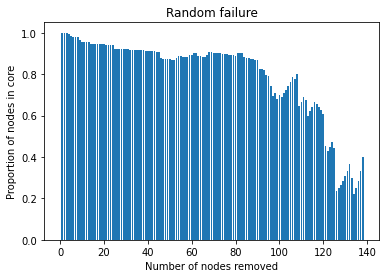

In [ ]:
plt.title('Random failure')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
nodes_core = {}
num_nodes_removed = 0
num_in_core =0
while(C.number_of_nodes() >= M):
  node_to_remove = random.sample(C.nodes, 1)
  C.remove_nodes_from(node_to_remove)
  num_nodes_removed=num_nodes_removed+1
  core = max(nx.connected_components(C), key=len) 
  nodes_core[num_nodes_removed] = len(core)/C.number_of_nodes()
pltx1 = list(range(0, (N - C.number_of_nodes())))#num nodes removed
plty1 = [nodes_core.get(n,0) for n in pltx1]
plt.bar(pltx1,plty1)
#plt.loglog(pltx1,plty1)
#plty, bins, patches = plt.hist(pltx, bins=50)

#### Targeted attack

Simulating a targeted attack is similar, except that instead of choosing randomly, we will select the M most central nodes at each step. To accomplish this we want something like the `max` function used earler to get the most central node, but able to get the top M nodes. We can use Python's `sorted` function in a similar way to `max` to first sort the nodes by centrality in descending, or reverse, order. Once sorted by degree, we take the first M nodes in the list:

In [ ]:
nodes_sorted_by_degree = sorted(G.nodes, key=G.degree, reverse=True)
top_degree_nodes = nodes_sorted_by_degree[:M]
top_degree_nodes

['105', '17', '95', '48', '132']

#<font color='red'>EXERCISE 3</font>

Write code which targets and removes the top M nodes, it should repeat this process until the number of nodes in the network is less than M

You need to make a graph of this targeted attack where the Y axis is the porportion of nodes in the core, and the X-axis is the number of nodes removed. 

In [ ]:
N = G.number_of_nodes()
number_of_steps = 25

# Note - the '//' operator divides and returns the integer value of the quotient. 
# It dumps the digits after the decimal.
M = N // number_of_steps

num_nodes_removed = range(0, N, M)
C = G.copy()

<BarContainer object of 140 artists>

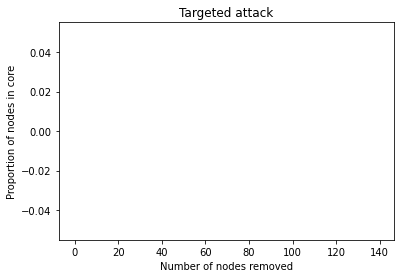

In [ ]:
plt.title('Targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')
# your code here
nodes_core = {}
num_nodes_removed = 0
num_in_core =0
while C.number_of_nodes() >= M:
  nodes_sorted_by_degree = sorted(C.nodes, key=C.degree, reverse=True)
  top_degree_nodes = nodes_sorted_by_degree[:M]
  C.remove_nodes_from(top_degree_nodes)
  core = max(nx.connected_components(C), key=len) 
  nodes_core[num_nodes_removed] = len(core)/C.number_of_nodes()
pltx2 = list(range(0, (N - C.number_of_nodes())))#num nodes removed
plty2 = [nodes_core.get(n,0) for n in pltx2]
plt.bar(pltx2,plty2)

#<font color='red'>EXERCISE 4</font>

Plot both the random failure and targeted attack curves on the same plot. 

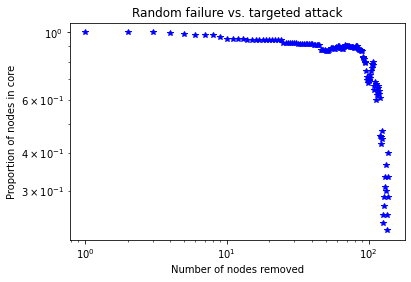

In [ ]:
plt.title('Random failure vs. targeted attack')
plt.xlabel('Number of nodes removed')
plt.ylabel('Proportion of nodes in core')

#your code here
plt.loglog(pltx1,plty1, 'b*')
plt.loglog(pltx2,plty2, 'r-')

#<font color='red'>EXERCISE 5</font>

What do you notice about the difference between these two types of attack on the network? 
Justify your answer - what do you think is/are the reason(s) for the difference?

In [ ]:
# I know I couldn't get the targeting attack to show carrectly but 
# real networks are robust against random failures, while fragile against targeted attacks

# **Before submitting:**

1.   At the top, click the file name and prefix "*yourlastname_*" in front
2.   Download your completed file
3.   *Reupload your completed file and re-run it, to make sure everything is working as expected.* 
